<a href="https://colab.research.google.com/github/afortuny/DeepLearningFastAI/blob/main/RunningShoeAPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Which running shoe are you wearing?

The following simple app uses computer vision to predict if your show belongs to adidas, nike or puma. Please upload only shoes of those brands.

In [ ]:
#os.chdir('DeepLearningFastAI/') we will be assuming you are in the folder where the pickle file and brands reside

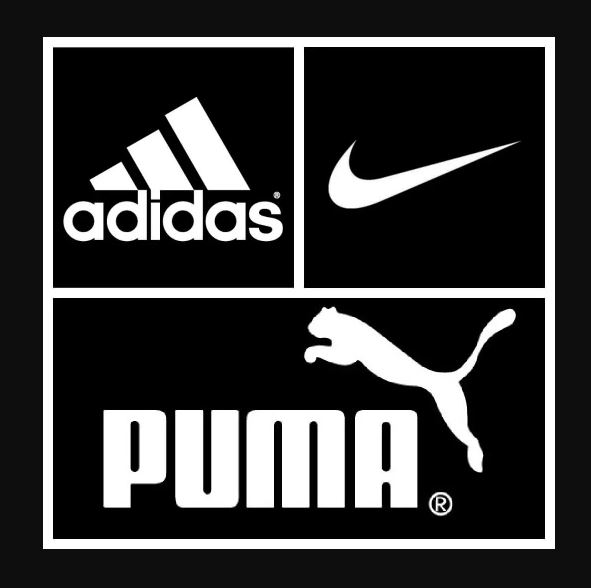

In [19]:
from IPython.display import Image
Image(filename="Brands.JPG")


In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
import fastai
fastai.__version__


Mounted at /content/gdrive


'2.5.6'

In [2]:
import ipywidgets as widgets
from fastai.vision.all import *
from fastai.vision.widgets import * 

In [14]:
learn_inf = load_learner('export.pkl')
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()


In [15]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'


In [16]:
btn_upload.observe(on_data_change, names=['data'])


In [17]:
display(VBox([widgets.Label('Upload your running shoe!'), btn_upload, out_pl, lbl_pred]))